In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../" * 3))

if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import qf
import matplotlib.pyplot as plt
import numpy as np

/Users/PhilippSchmidt/miniforge3/envs/quantforce/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tickers: list[str] = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "NFLX"]
tickers = qf.DOWJONES

data = qf.get_data(tickers, 
                   start=qf.DEFAULT_TRAIN_START, 
                   end=qf.DEFAULT_TRAIN_END, 
                   indicators="Close", 
                   imputation_method="shrinkage")
data.head(10)

Ticker            DIS         VZ        HON        IBM        JNJ    AMZN  \
Price           Close      Close      Close      Close      Close   Close   
2008-03-19  26.180058  13.515104  35.439728  63.005363  38.908901  3.5085   
2008-03-20  26.733154  13.895973  34.912403  63.754250  39.208771  3.6595   
2008-03-24  26.850483  14.222988  35.375420  64.147552  38.914898  3.7975   
2008-03-25  26.884001  14.196055  36.012058  63.560299  38.711002  3.7585   
2008-03-26  26.615831  13.903667  35.774132  62.989162  38.800953  3.6900   
2008-03-27  26.297379  13.834417  35.368988  62.240253  38.752972  3.5400   
2008-03-28  25.978930  13.792100  35.915592  61.728439  38.489109  3.4880   
2008-03-31  26.297379  14.022930  36.282135  62.035549  38.902912  3.5650   
2008-04-01  26.741537  14.606075  37.163162  62.762890  39.502621  3.8350   
2008-04-02  26.448229  14.671782  37.060257  61.857727  39.166775  3.8685   

Ticker           CSCO          GS        MRK        SHW  ...         KO  \
Price           Close       Close      Close      Close  ...      Close   
2008-03-19  16.110493  124.557991  22.556087  14.047793  ...  17.578745   
2008-03-20  16.308006  134.388535  22.750242  14.461594  ...  17.895370   
2008-03-24  16.880793  133.827484  23.217197  14.206326  ...  17.936417   
2008-03-25  16.953213  134.388535  23.437567  14.039731  ...  18.003849   
2008-03-26  16.314592  131.283798  23.453304  13.695791  ...  17.927624   
2008-03-27  15.919568  125.792442  23.495295  13.617864  ...  17.974529   
2008-03-28  15.853723  123.031830  23.353615  13.569499  ...  17.866056   
2008-03-31  15.860313  123.735023  19.911697  13.714595  ...  17.845539   
2008-04-01  16.446262  132.316223  20.105825  14.609385  ...  18.012646   
2008-04-02  16.433098  132.323669  19.465721  14.851216  ...  17.725330   

Ticker            UNH        NKE         BA        CVX       MSFT      NVDA  \
Price           Close      Close      Close      Close      Close     Close   
2008-03-19  28.229650  12.310326  54.094528  41.544502  20.672213  0.404828   
2008-03-20  28.047014  13.393426  55.088791  42.214149  21.076694  0.424542   
2008-03-24  28.356695  13.753799  56.186142  42.620007  21.069475  0.459156   
2008-03-25  28.015253  13.612436  55.898911  42.888897  21.047800  0.465804   
2008-03-26  27.078217  13.194327  56.193508  43.101967  20.628864  0.450904   
2008-03-27  26.998817  13.136591  54.661640  42.817875  20.260490  0.444485   
2008-03-28  27.316463  13.112695  54.109261  42.868599  20.159376  0.451133   
2008-03-31  27.308506  13.538771  54.772110  43.304909  20.498854  0.453655   
2008-04-01  28.810631  13.851362  55.884174  44.005013  21.307823  0.481392   
2008-04-02  28.580132  13.532800  56.598572  44.395630  21.062243  0.466721   

Ticker             PG        WMT          V  
Price           Close      Close      Close  
2008-03-19  41.127773  11.780885  12.514247  
2008-03-20  42.073952  12.349280  14.252951  
2008-03-24  42.437859  12.442080  13.229659  
2008-03-25  42.177055  12.307520  14.009307  
2008-03-26  42.237698  12.272721  14.166567  
2008-03-27  42.098217  12.149761  13.933999  
2008-03-28  42.116405  12.091764  13.900782  
2008-03-31  42.498512  12.221679  13.812185  
2008-04-01  43.147472  12.546475  13.646064  
2008-04-02  42.747181  12.634637  13.803320  

[10 rows x 24 columns]

<Axes: title={'center': 'Close Price of All Tickers'}, xlabel='Date', ylabel='Price'>

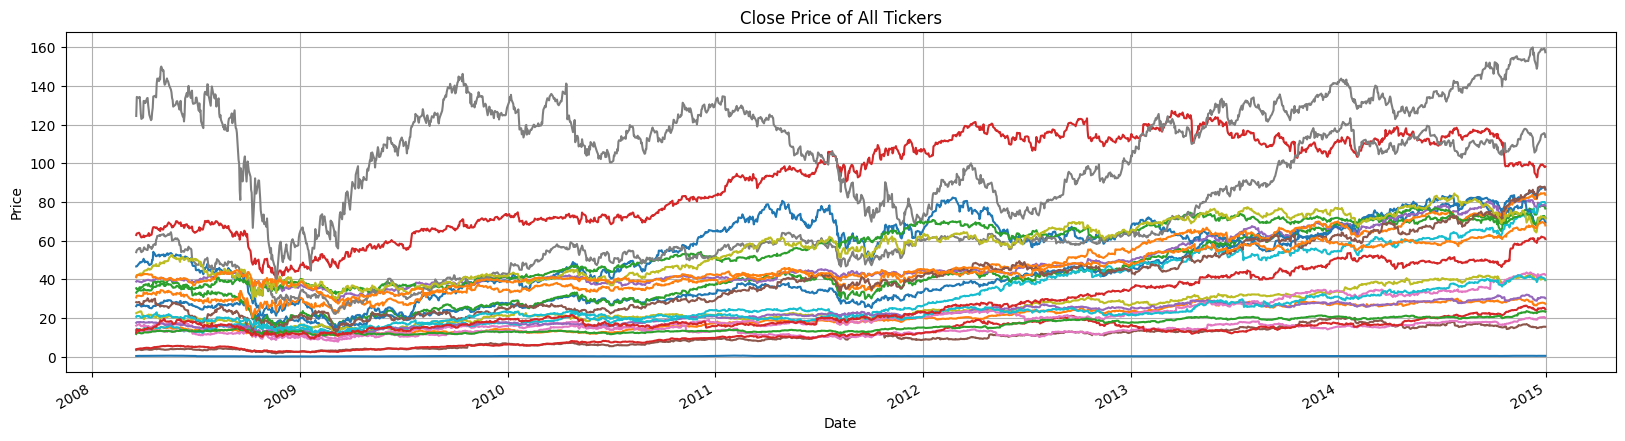

In [3]:
data.plot(figsize=(20, 5), title="Close Price of All Tickers", ylabel="Price", xlabel="Date", grid=True, legend=False)

In [4]:
# Calculate log returns
#returns = data.pct_change().dropna()
log_returns = data.pct_change().apply(lambda x: np.log(1 + x)).dropna()

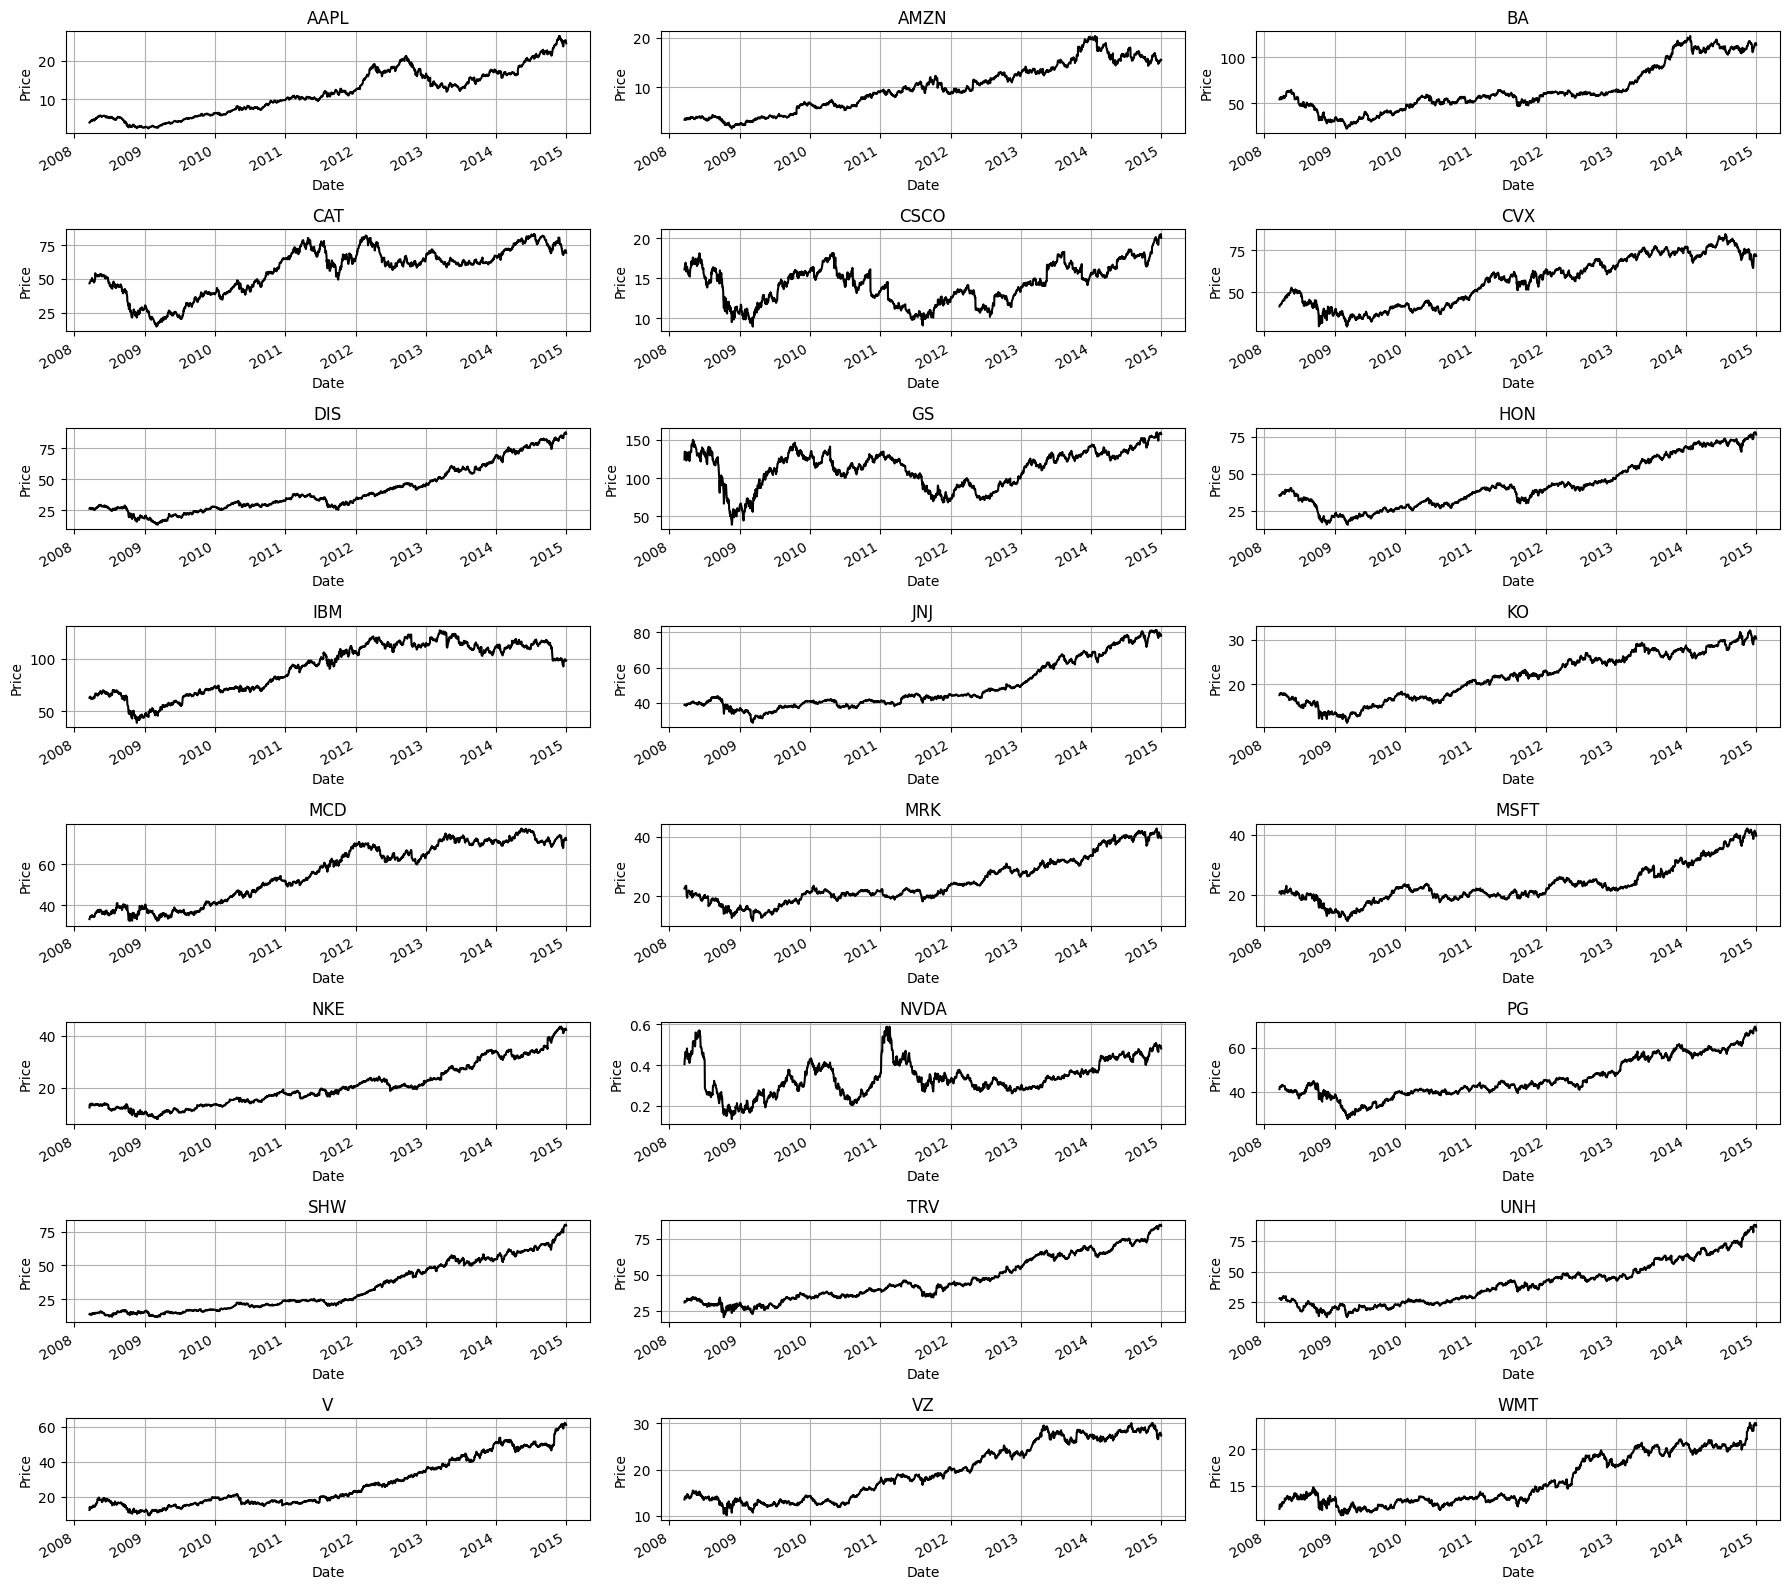

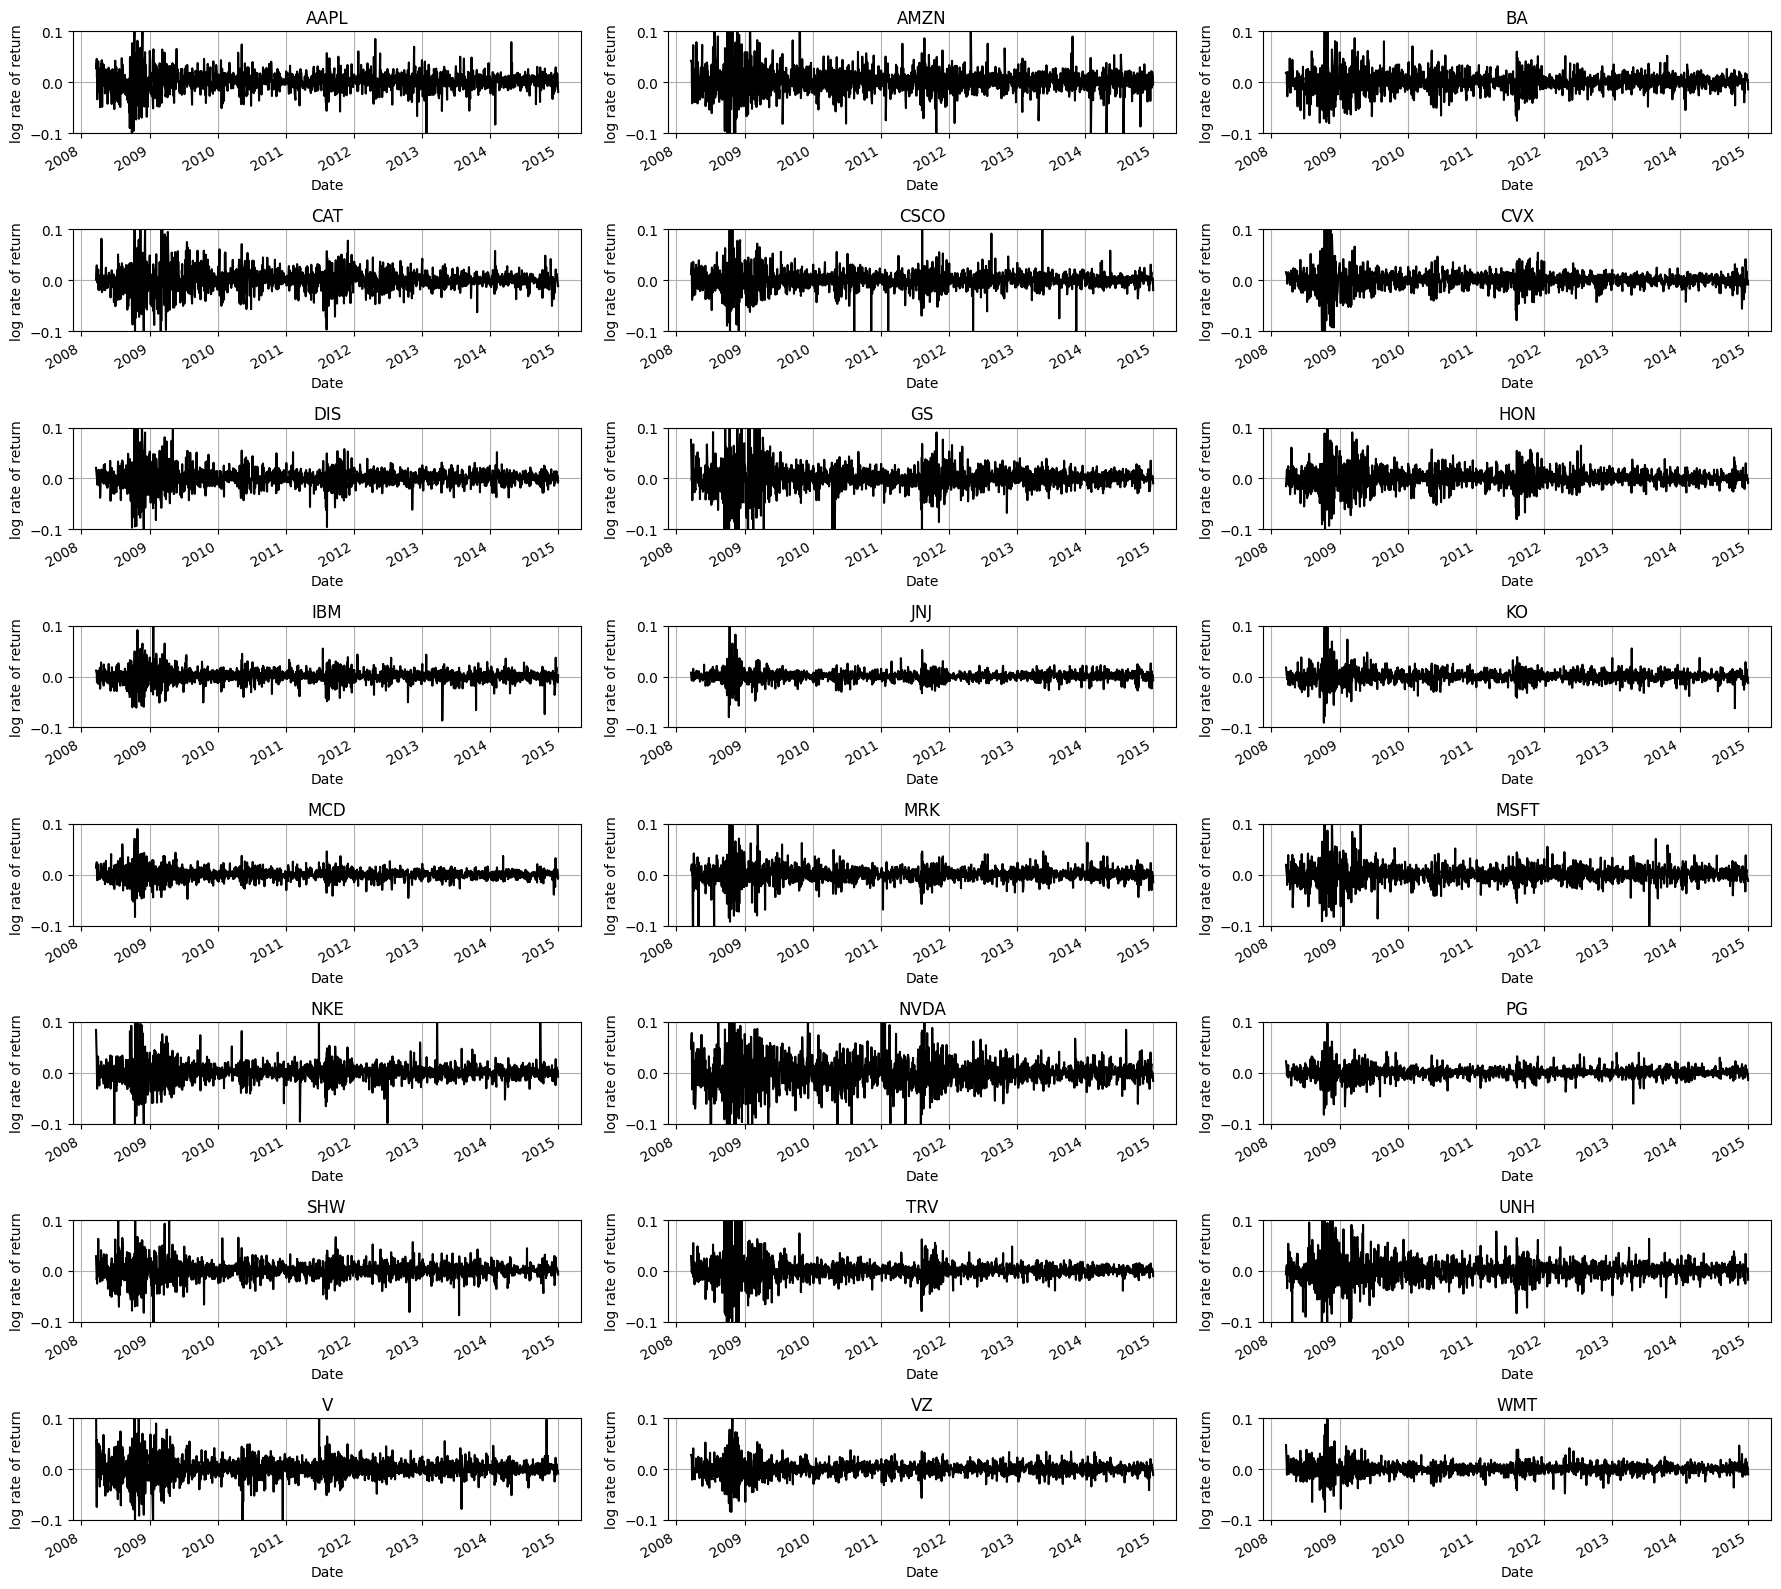

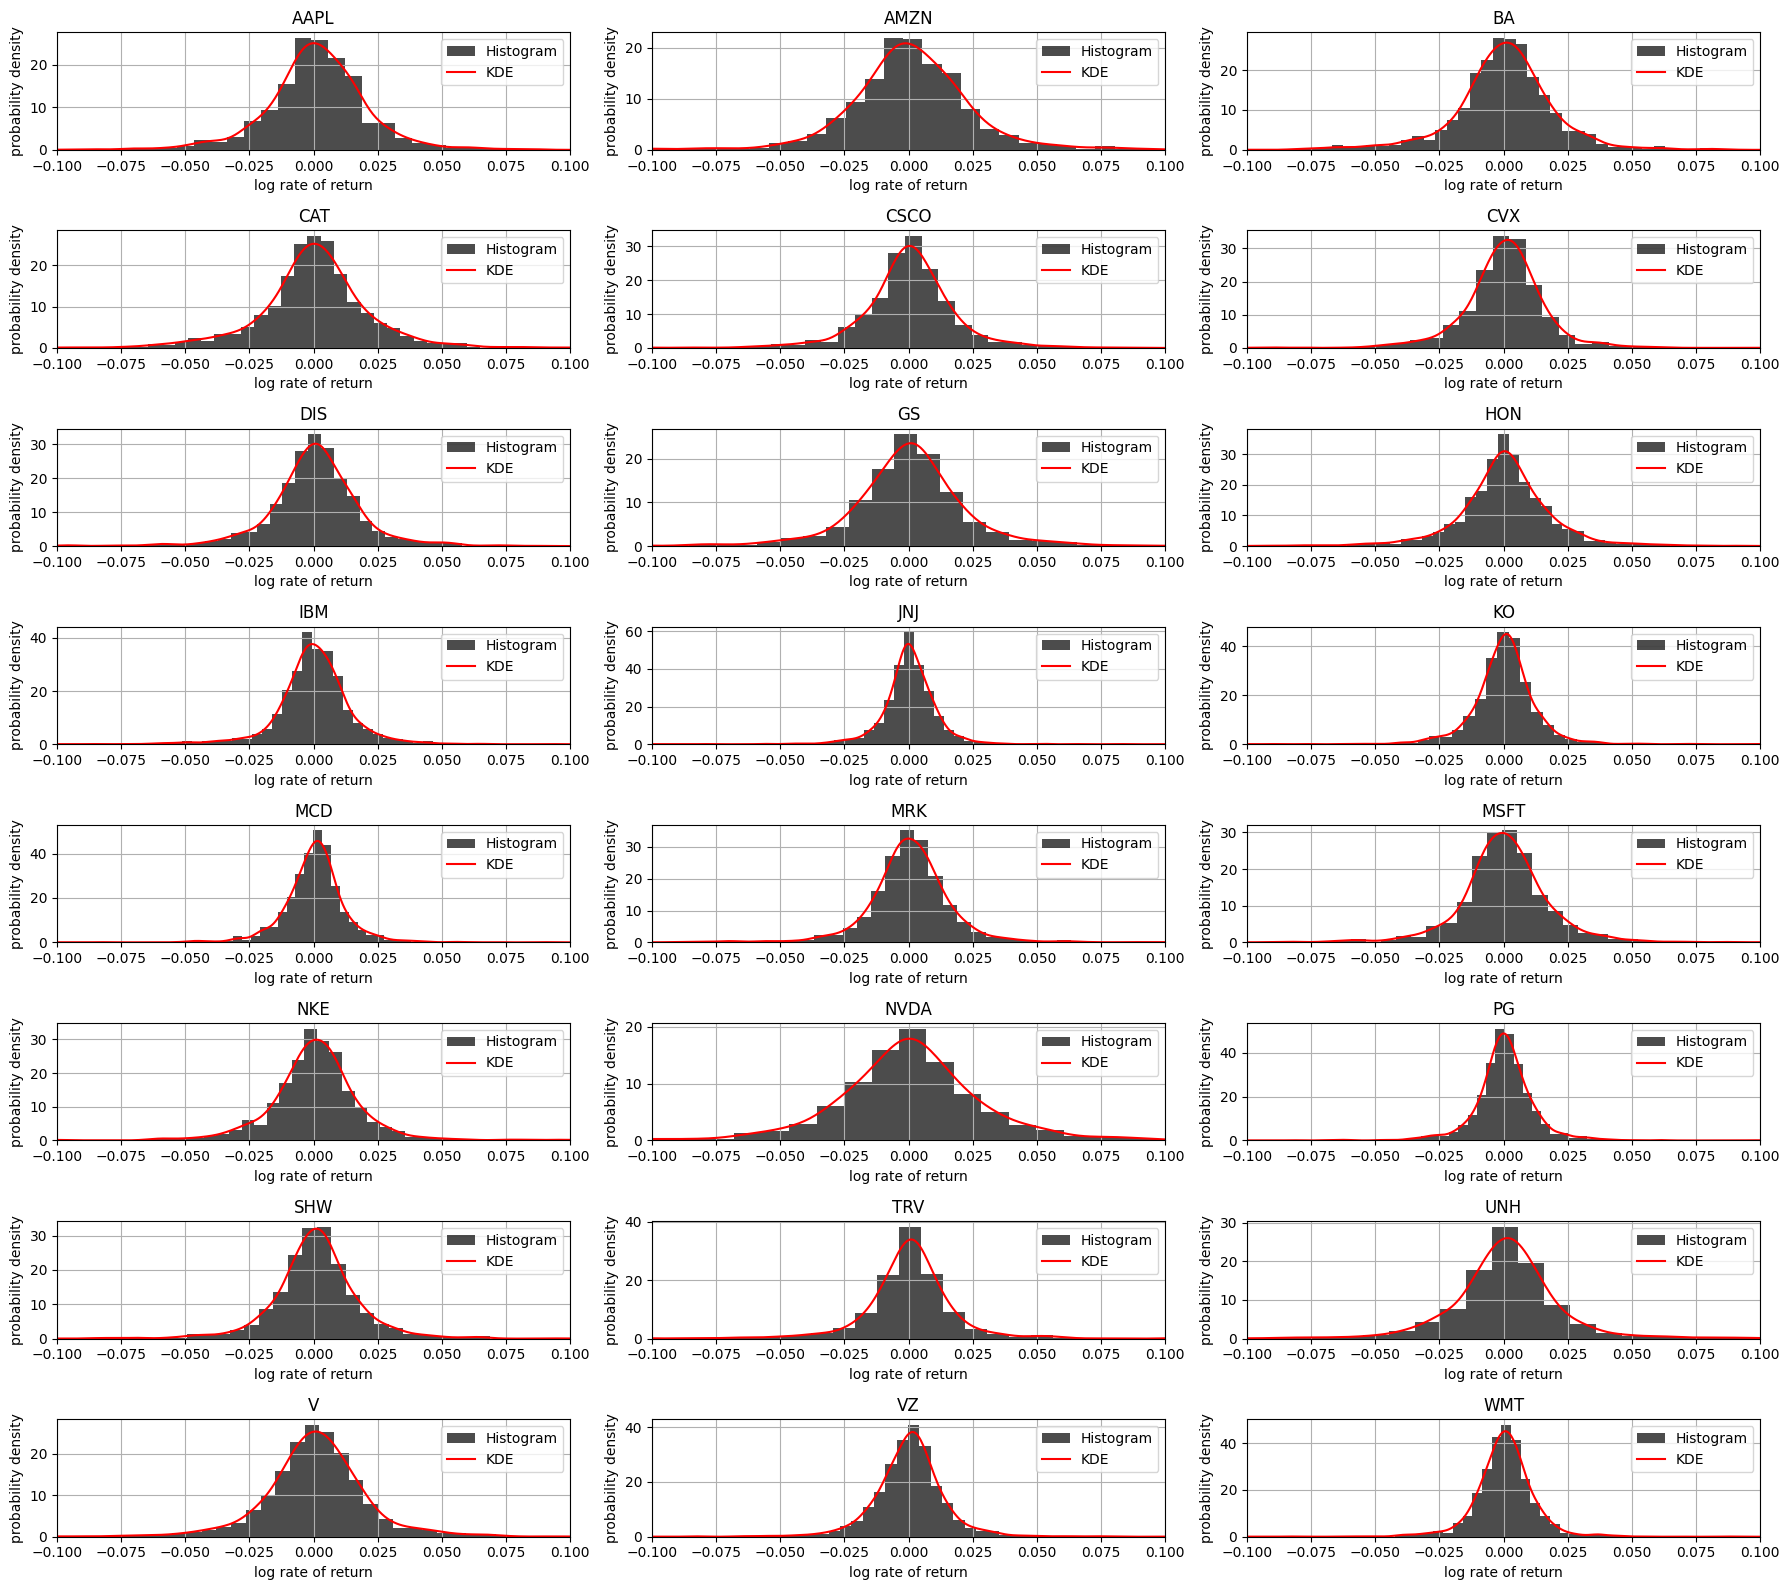

In [5]:
qf.plot_grid(data, n_cols=3, y_name="Price", x_name="Date", figsize=(6, 2))
qf.plot_grid(log_returns, n_cols=3, ylim=(-0.1, 0.1), figsize=(6, 2), y_name="log rate of return", x_name="Date")
qf.plot_hist_grid(log_returns, n_cols=3, bins=50, figsize=(6, 2), log_y_scale=False, x_name="log rate of return", y_name="probability density")

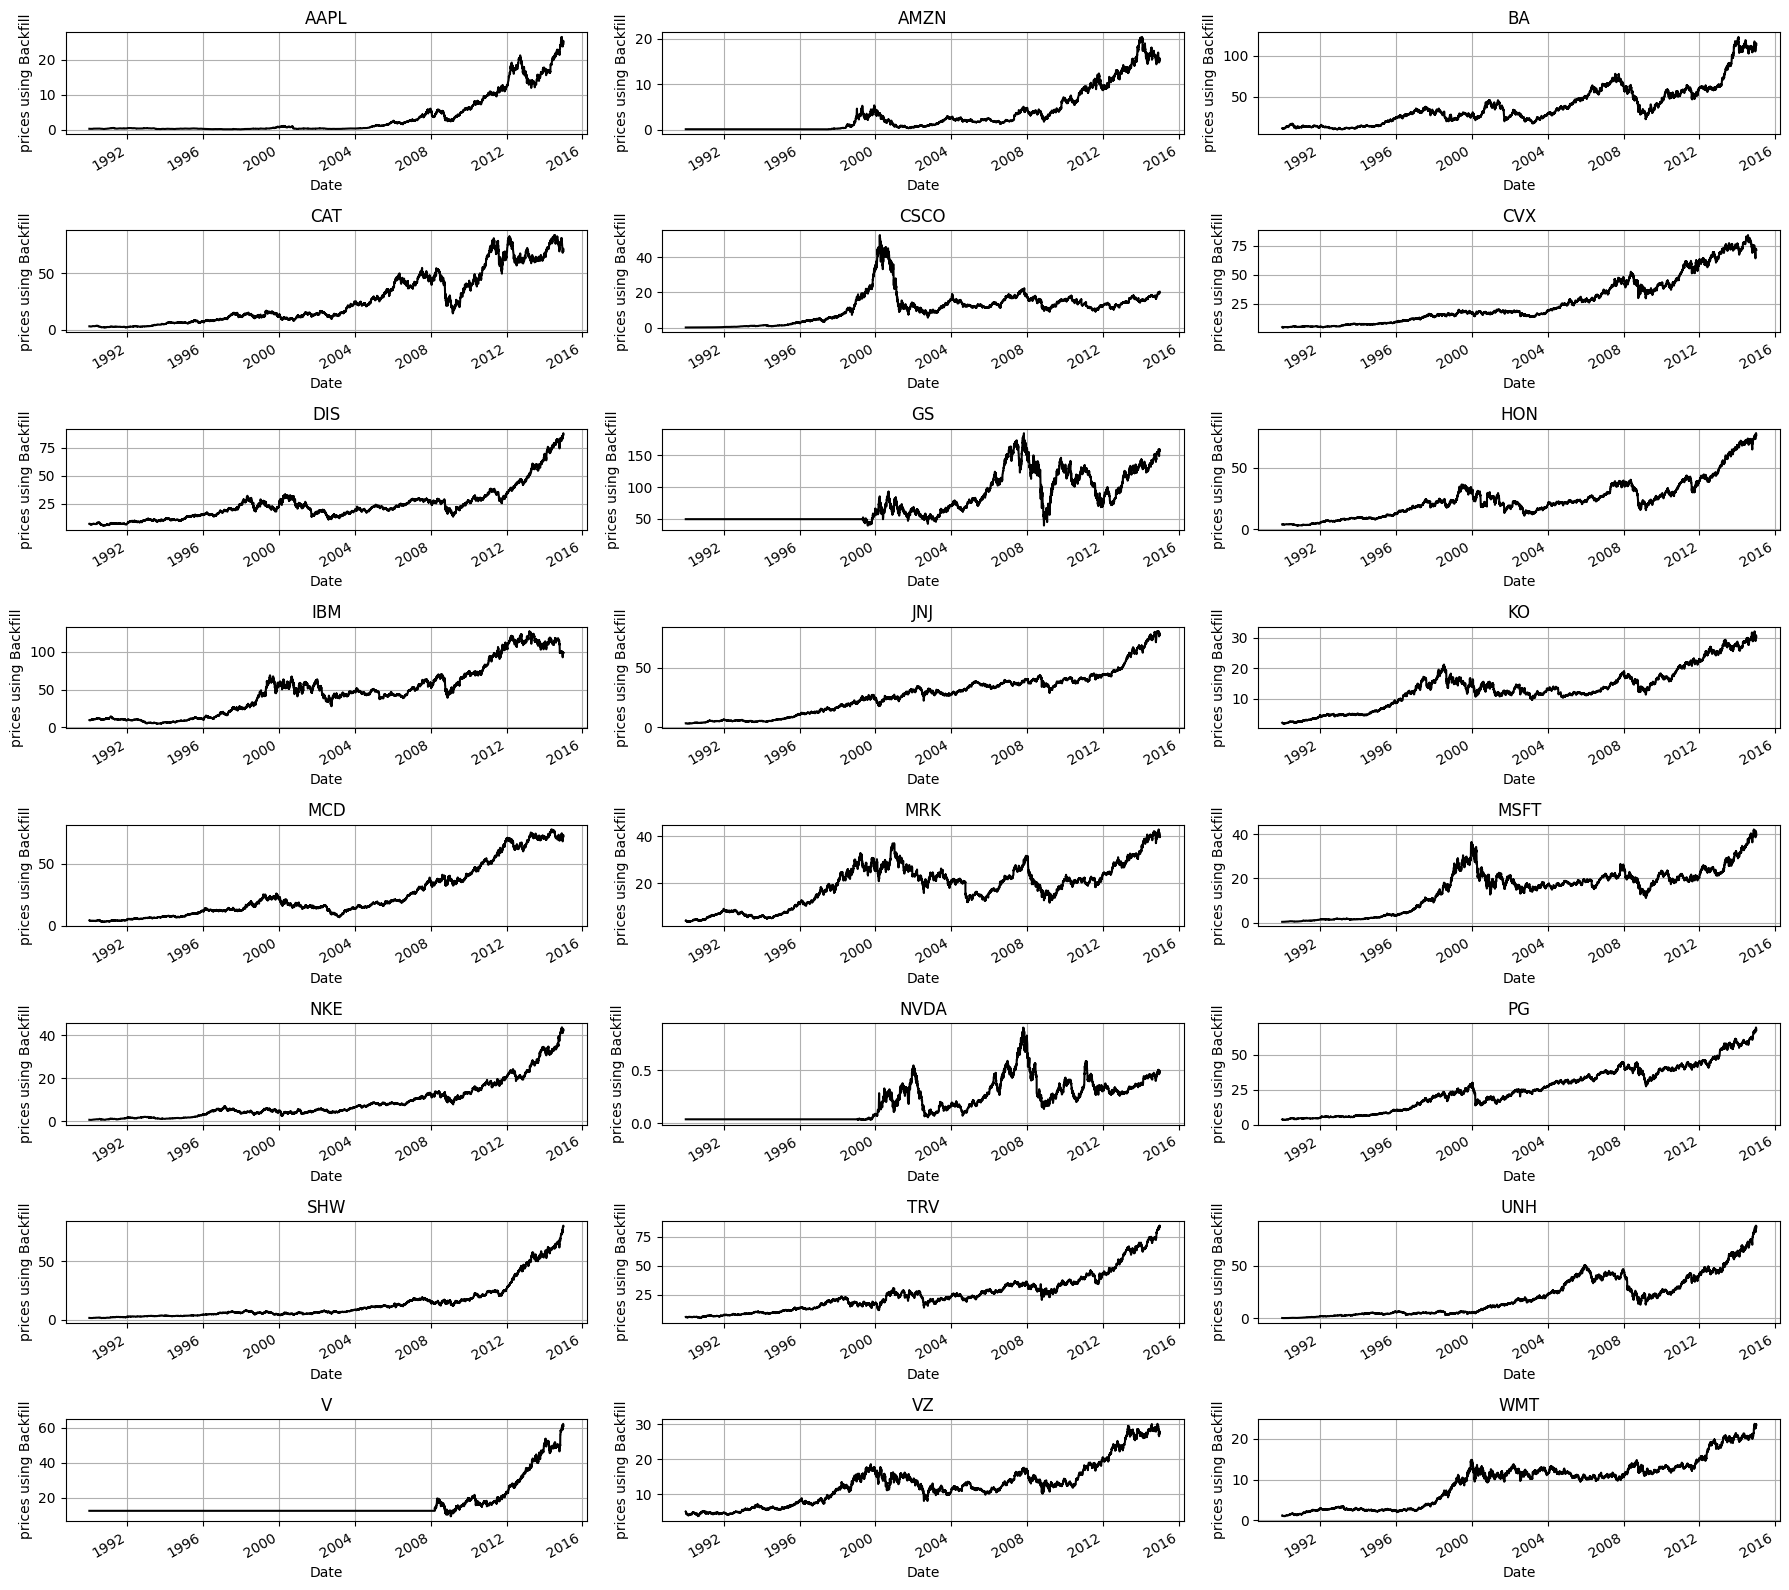

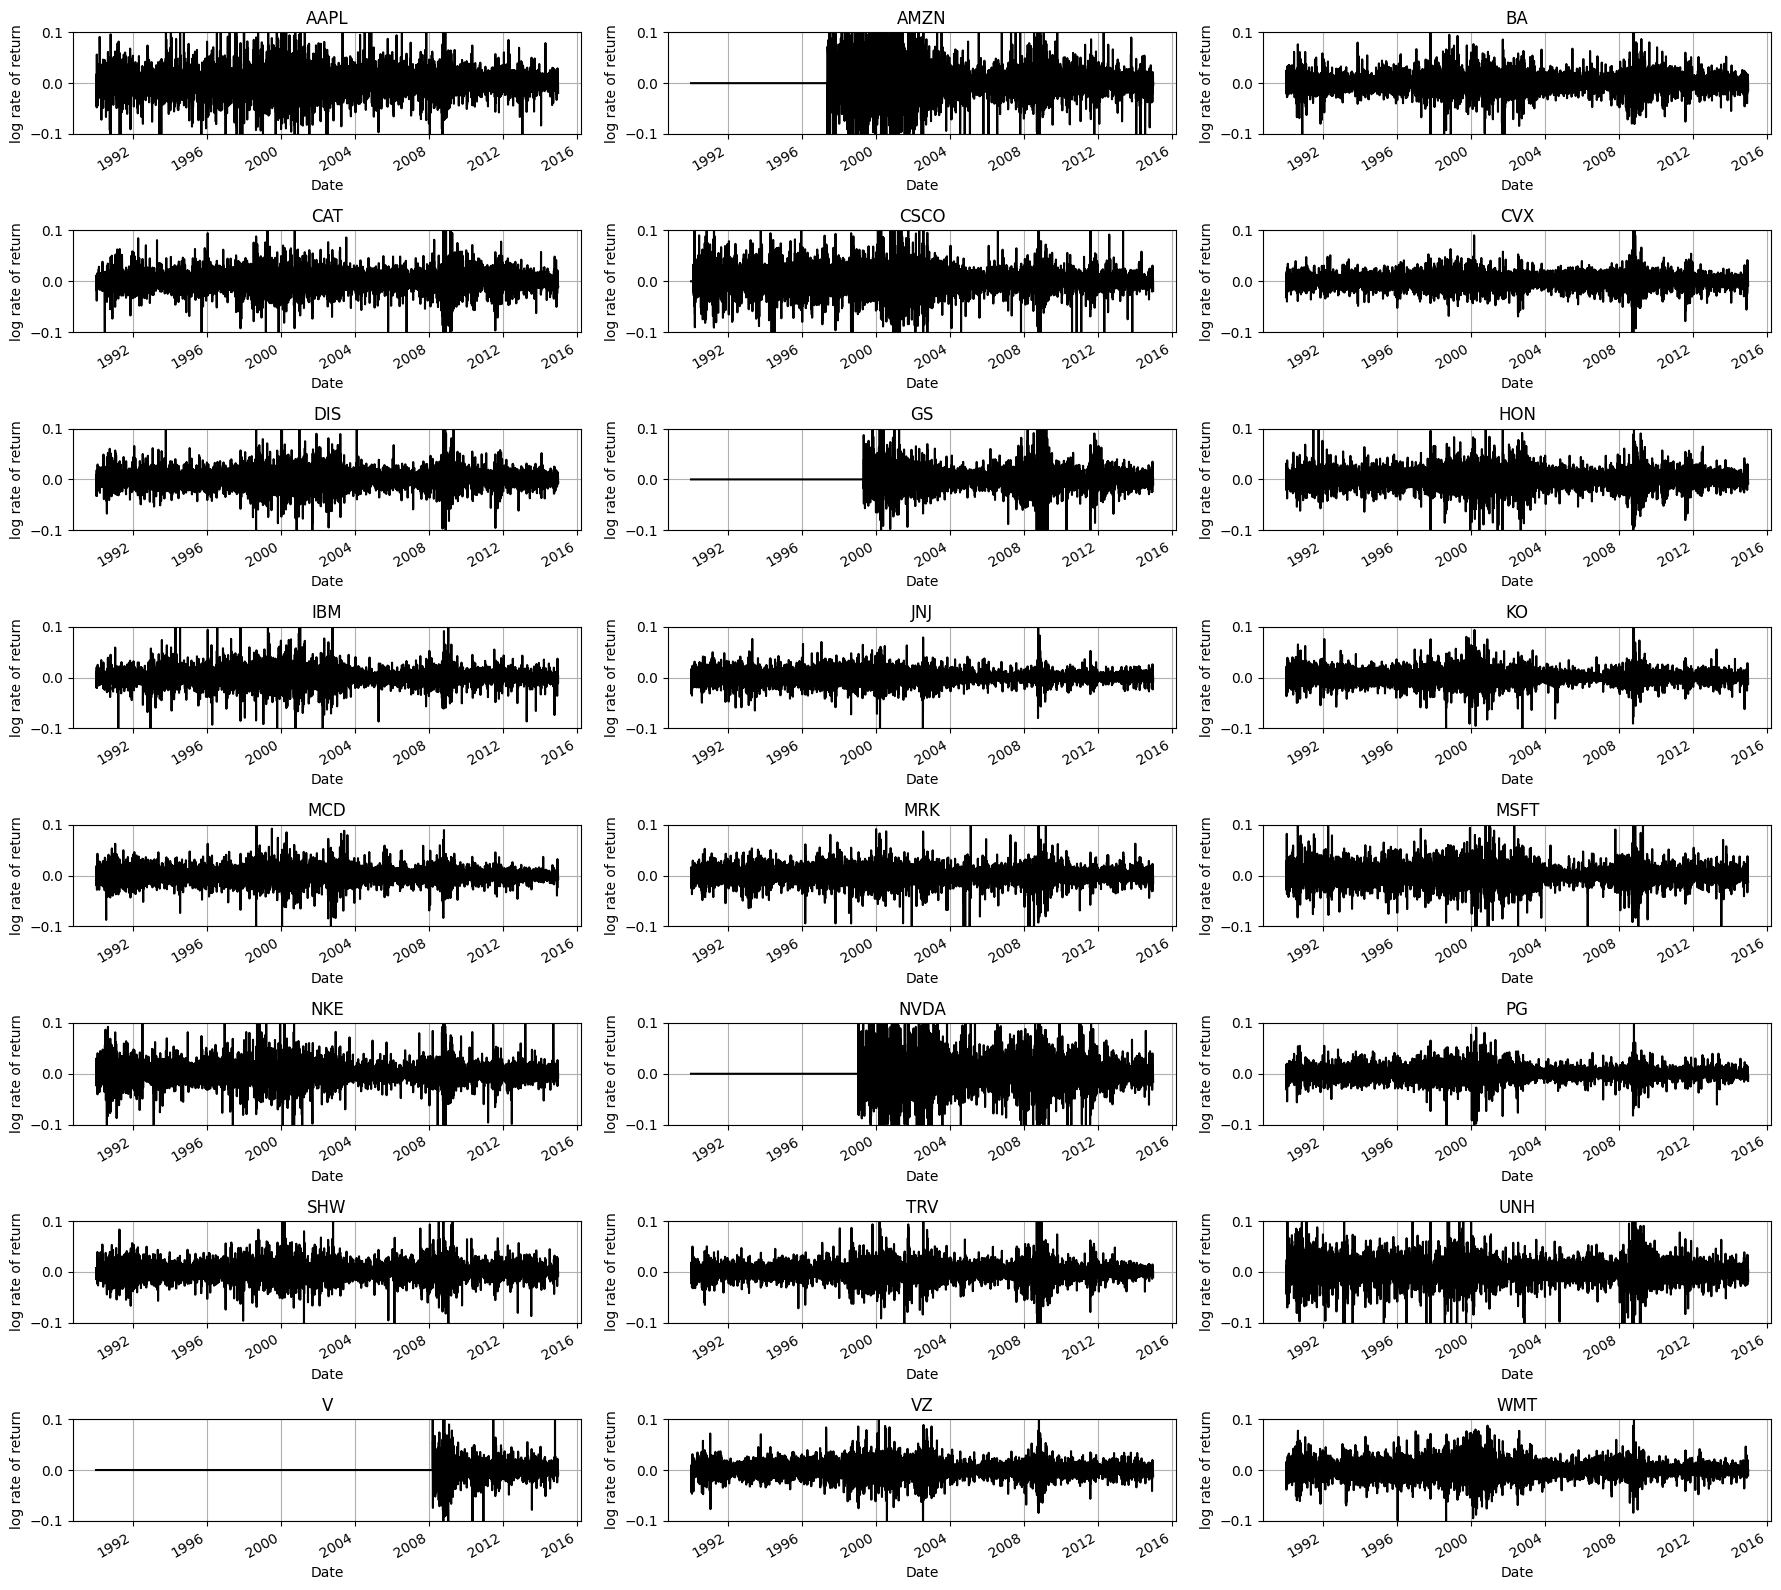

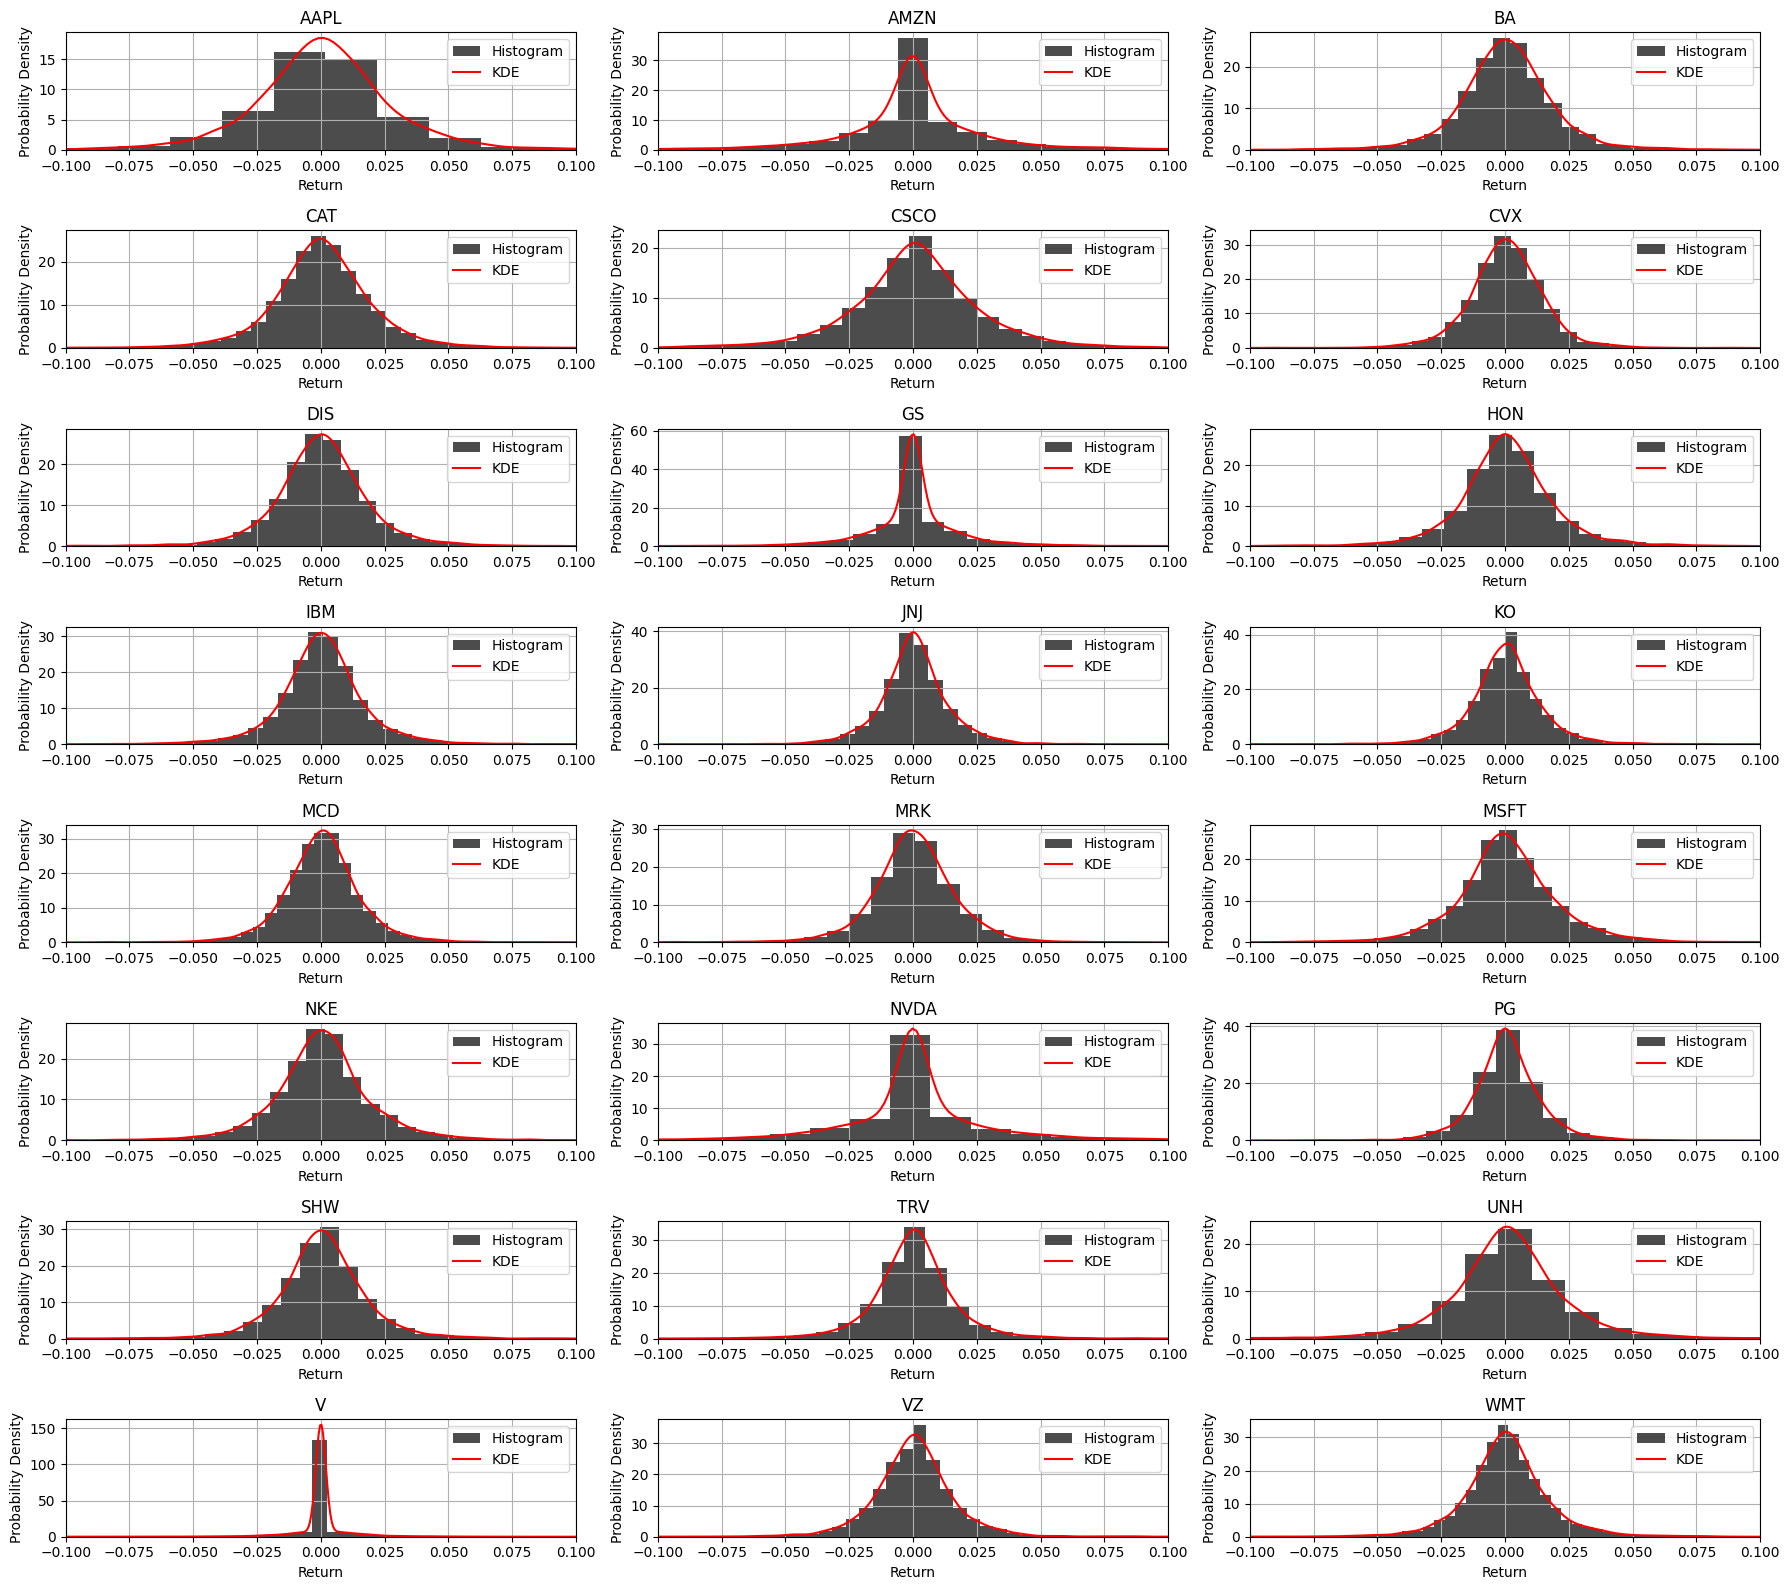

In [6]:
# Now we want to compare the statistics of the returns of the tickers if we use 
prices_bfill = qf.get_data(tickers, 
            start=qf.DEFAULT_TRAIN_START, 
            end=qf.DEFAULT_TRAIN_END, 
            indicators="close", 
            imputation_method="bfill",
            n_trading_days=252)

returns_bfill = prices_bfill.pct_change().dropna()
log_returns_bfill = prices_bfill.pct_change().apply(lambda x: np.log(1 + x)).dropna()


qf.plot_grid(prices_bfill, n_cols=3, figsize=(6, 2), y_name="prices using Backfill")

qf.plot_grid(log_returns_bfill, n_cols=3, ylim=(-0.1, 0.1), figsize=(6, 2), y_name="log rate of return")

qf.plot_hist_grid(log_returns_bfill, n_cols=3, bins=50, figsize=(6, 2), log_y_scale=False)


# Comparison of Statistics

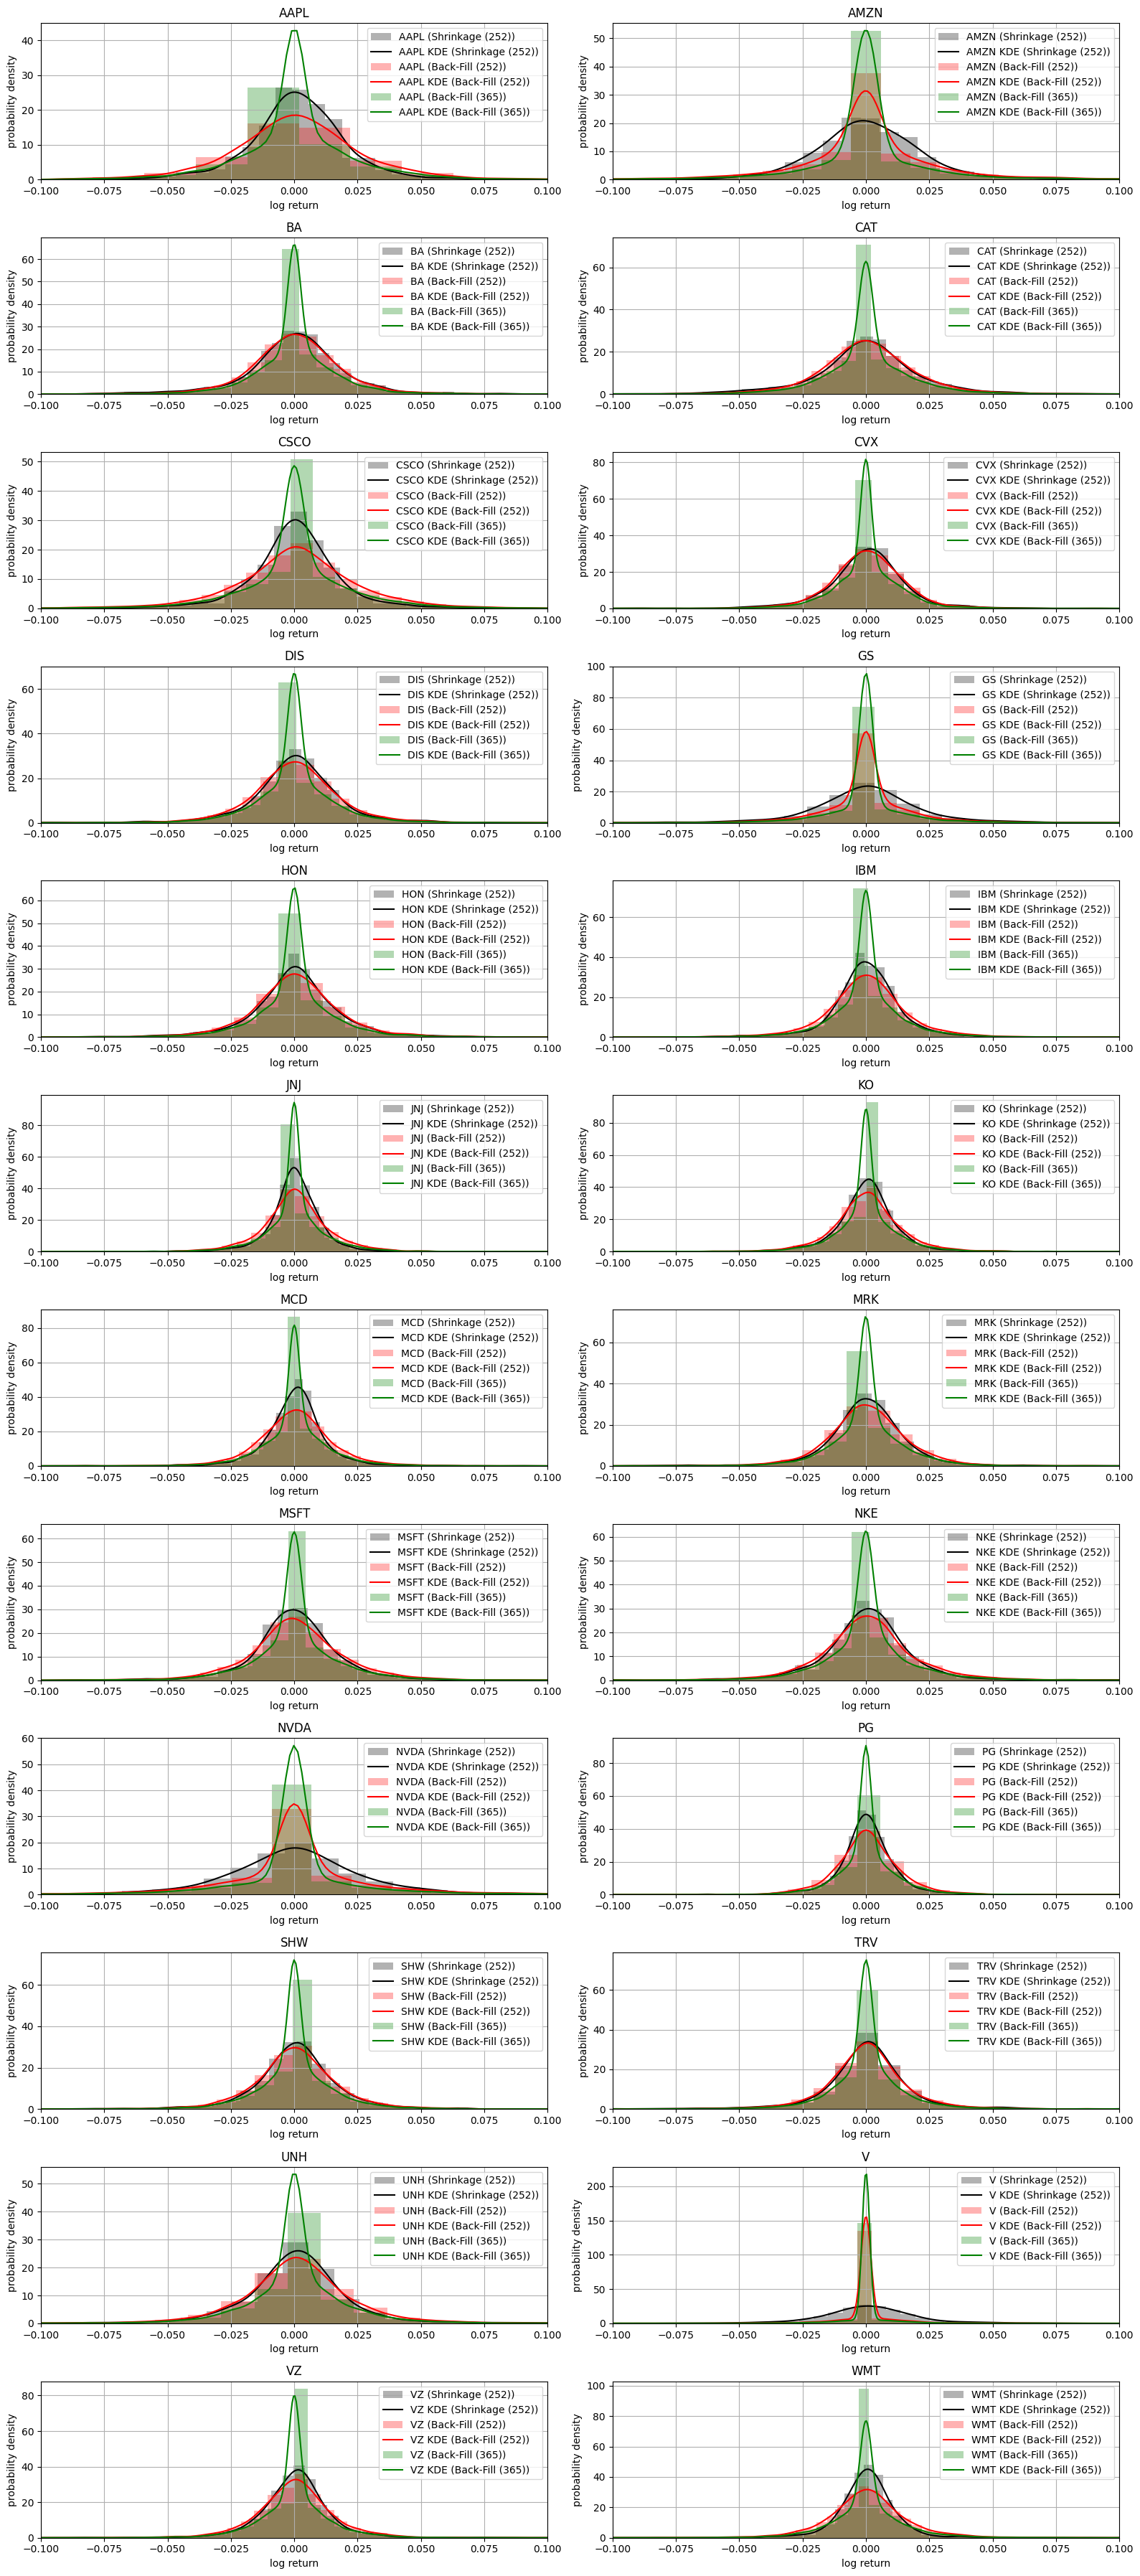

In [7]:
returns_bfill_365 = qf.get_data(tickers, 
                              start=qf.DEFAULT_TRAIN_START, 
                              end=qf.DEFAULT_TRAIN_END, 
                              indicators="Close", 
                              imputation_method="bfill",
                              n_trading_days=365).pct_change().dropna()

log_returns_bfill_365 = returns_bfill_365.apply(lambda x: np.log(1 + x)).dropna()

qf.plot_hist_grid_compare([log_returns, log_returns_bfill, log_returns_bfill_365], data_names=["Shrinkage (252)", "Back-Fill (252)", "Back-Fill (365)"],
                          n_cols=2, bins=50, figsize=(8, 3), x_name="log return", y_name="probability density")

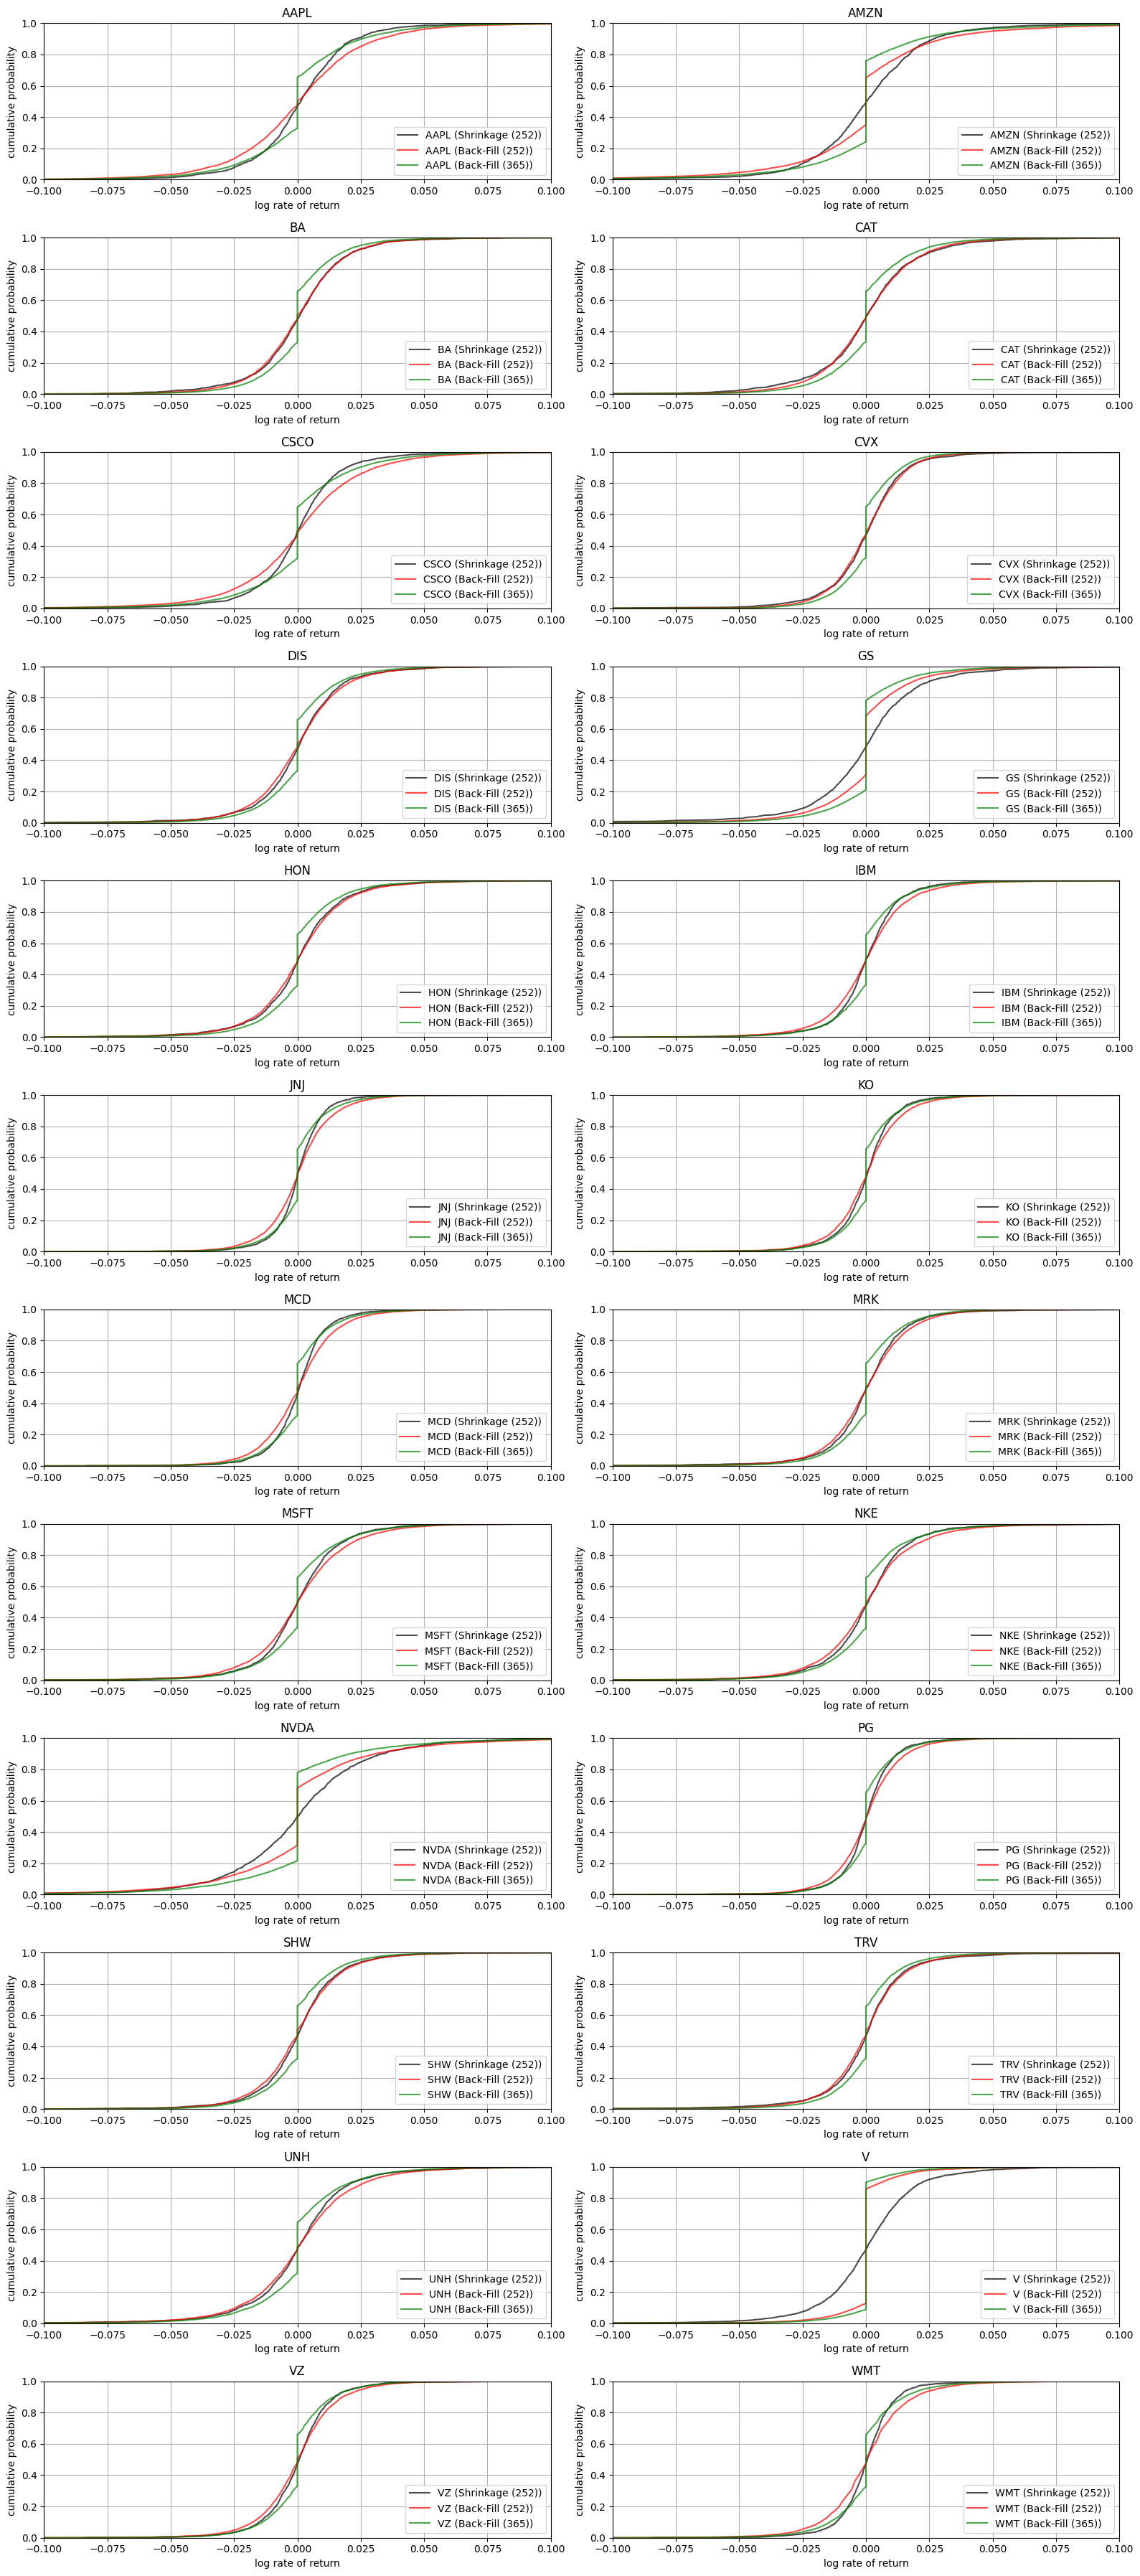

In [8]:
qf.plot_cdf_grid_compare([log_returns, log_returns_bfill, log_returns_bfill_365], data_names=["Shrinkage (252)", "Back-Fill (252)", "Back-Fill (365)"],
                          n_cols=2, figsize=(8, 3), x_name="log rate of return", y_name="cumulative probability")

In [15]:
# Calculate and compare the statistics of the returns
def calculate_statistics(returns):
    stats = {
        'mean': returns.mean(),
        'std': returns.std(),
        'skew': returns.skew(),
        'kurtosis': returns.kurtosis()
    }
    return stats

stats = calculate_statistics(log_returns)
stats_bfill = calculate_statistics(log_returns_bfill)

import pandas as pd

# Now stats is a dictionary of multiindex dataframes
# Make a new level in the index for the statistics
stats_df = pd.DataFrame(stats).T
stats_bfill_df = pd.DataFrame(stats_bfill).T

error = stats_df - stats_bfill_df

# Absoluter Fehler
abs_error = (stats_df - stats_bfill_df).abs()

# Relativer Fehler nur für std
rel_error_std = abs_error.loc['std'] / stats_df.loc['std']

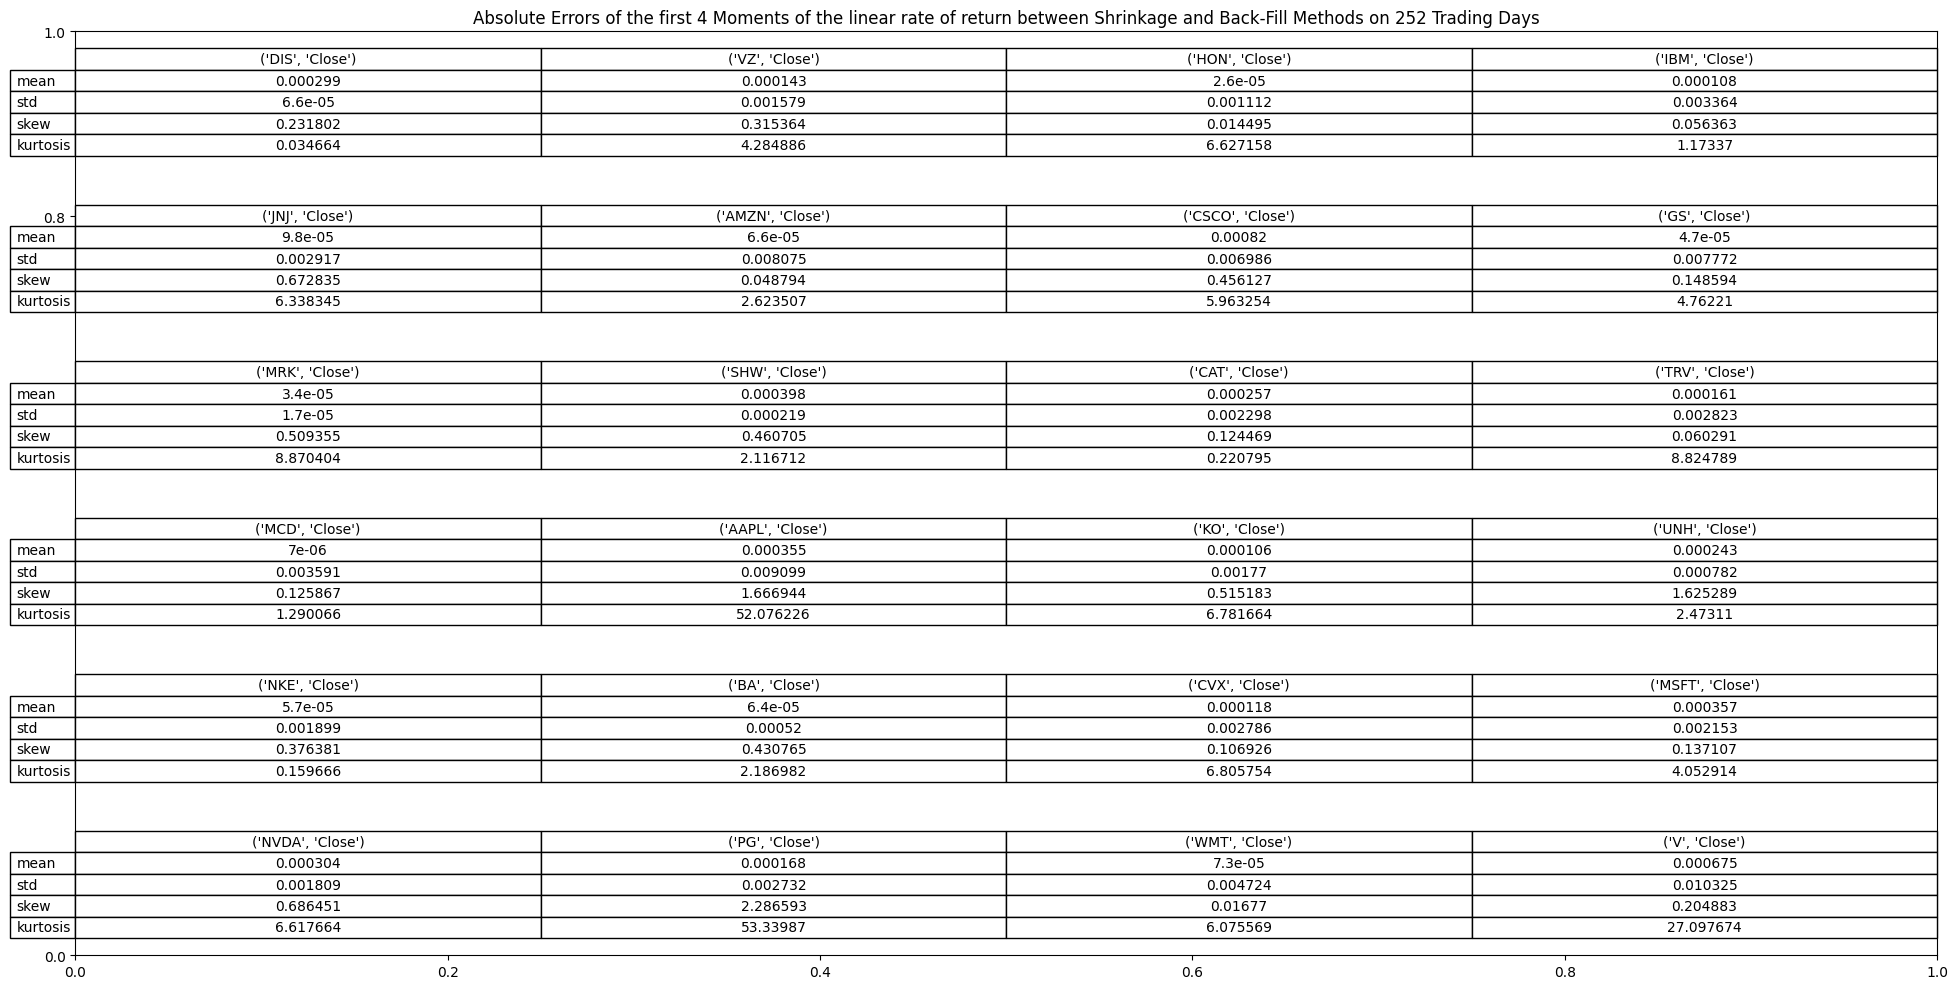

In [16]:
# Plot the table of absolute errors with a name
plt.figure(figsize=(20, 10))  # Increased height to accommodate multiple lines
plt.title('Absolute Errors of the first 4 Moments of the linear rate of return between Shrinkage and Back-Fill Methods on 252 Trading Days')

# Split the data into chunks of 8 columns each
n_cols = len(abs_error.columns)
chunk_size = 4
n_chunks = (n_cols + chunk_size - 1) // chunk_size

for i in range(n_chunks):
    start_col = i * chunk_size
    end_col = min((i + 1) * chunk_size, n_cols)
    
    # Create a subplot for each chunk
    plt.subplot(n_chunks, 1, i + 1)
    plt.table(cellText=abs_error.iloc[:, start_col:end_col].round(6).values,
              rowLabels=abs_error.index,
              colLabels=abs_error.columns[start_col:end_col],
              loc='center',
              cellLoc='center')
    plt.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()


In [25]:
def compare_statistics(stats_df, stats_bfill_df):
    import numpy as np
    import pandas as pd

    # Fehlerberechnung
    abs_error = (stats_df - stats_bfill_df).abs()
    rel_error = abs_error / stats_df.replace(0, np.nan)

    rmse_stats = np.sqrt(
        (stats_df.loc['mean'] - stats_bfill_df.loc['mean']) ** 2 +
        (stats_df.loc['std'] - stats_bfill_df.loc['std']) ** 2
    )

    pooled_std = np.sqrt((stats_df.loc['std'] ** 2 + stats_bfill_df.loc['std'] ** 2) / 2)
    cohens_d = (stats_df.loc['mean'] - stats_bfill_df.loc['mean']) / pooled_std

    kl_divergence = np.log(stats_bfill_df.loc['std'] / stats_df.loc['std']) + (
        (stats_df.loc['std'] ** 2 + (stats_df.loc['mean'] - stats_bfill_df.loc['mean']) ** 2)
        / (2 * stats_bfill_df.loc['std'] ** 2)
    ) - 0.5

    # Ergebnis-DataFrame
    result = pd.DataFrame({
        'abs_mean_error': abs_error.loc['mean'],
        'abs_std_error': abs_error.loc['std'],
        'rel_std_error': rel_error.loc['std'],
        'rmse_stats': rmse_stats,
        'cohens_d': cohens_d,
        'kl_divergence': kl_divergence
    })

    # Bewertungsfunktion für jede Metrik
    def assess_metric(metric_name, value):
        limits = {
            'abs_mean_error': (0.0005, 0.001),
            'abs_std_error': (0.001, 0.005),
            'rel_std_error': (0.02, 0.05),
            'rmse_stats': (0.002, 0.005),
            'cohens_d': (0.2, 0.5),
            'kl_divergence': (0.005, 0.01)
        }
        low, high = limits[metric_name]
        abs_val = abs(value)
        if abs_val <= low:
            return 'Vertretbar'
        elif abs_val <= high:
            return 'Grenzwertig'
        else:
            return 'Kritisch'

    # Einzelbewertungen
    for metric in result.columns:
        result[f'{metric}_bewertung'] = result[metric].apply(lambda x: assess_metric(metric, x))

    # Gesamtbewertung (wenn ≥ 1 kritisch: "Kritisch", sonst wenn ≥ 1 grenzwertig: "Grenzwertig", sonst "Vertretbar")
    def assess_overall(row):
        status = [row[f'{metric}_bewertung'] for metric in result.columns if not metric.endswith('_bewertung')]
        if 'Kritisch' in status:
            return 'Kritisch'
        elif 'Grenzwertig' in status:
            return 'Grenzwertig'
        else:
            return 'Vertretbar'

    result['gesamt_bewertung'] = result.apply(assess_overall, axis=1)
    return result

In [27]:
result_df = compare_statistics(stats_df, stats_bfill_df)
result_df.head(24)

abs_mean_error  abs_std_error  rel_std_error  rmse_stats  \
Ticker Price                                                             
DIS    Close        0.000299       0.000066       0.003445    0.000306   
VZ     Close        0.000143       0.001579       0.108216    0.001586   
HON    Close        0.000026       0.001112       0.058922    0.001113   
IBM    Close        0.000108       0.003364       0.231695    0.003365   
JNJ    Close        0.000098       0.002917       0.266492    0.002919   
AMZN   Close        0.000066       0.008075       0.309676    0.008076   
CSCO   Close        0.000820       0.006986       0.340860    0.007034   
GS     Close        0.000047       0.007772       0.280627    0.007772   
MRK    Close        0.000034       0.000017       0.000946    0.000038   
SHW    Close        0.000398       0.000219       0.012325    0.000455   
CAT    Close        0.000257       0.002298       0.100855    0.002312   
TRV    Close        0.000161       0.002823       0.136536    0.002827   
MCD    Close        0.000007       0.003591       0.297774    0.003591   
AAPL   Close        0.000355       0.009099       0.432445    0.009106   
KO     Close        0.000106       0.001770       0.137598    0.001774   
UNH    Close        0.000243       0.000782       0.032717    0.000819   
NKE    Close        0.000057       0.001899       0.098577    0.001900   
BA     Close        0.000064       0.000520       0.026320    0.000524   
CVX    Close        0.000118       0.002786       0.152803    0.002789   
MSFT   Close        0.000357       0.002153       0.115625    0.002182   
NVDA   Close        0.000304       0.001809       0.057766    0.001834   
PG     Close        0.000168       0.002732       0.228518    0.002737   
WMT    Close        0.000073       0.004724       0.386959    0.004724   
V      Close        0.000675       0.010325       0.478925    0.010347   

              cohens_d  kl_divergence abs_mean_error_bewertung  \
Ticker Price                                                     
DIS    Close  0.015543       0.000132               Vertretbar   
VZ     Close  0.009264       0.009909               Vertretbar   
HON    Close -0.001327       0.003157               Vertretbar   
IBM    Close -0.006628       0.037992               Vertretbar   
JNJ    Close -0.007871       0.047996               Vertretbar   
AMZN   Close  0.002169       0.061284               Vertretbar   
CSCO   Close -0.033839       0.071858              Grenzwertig   
GS     Close -0.001962       0.136816               Vertretbar   
MRK    Close -0.001926       0.000003               Vertretbar   
SHW    Close  0.022290       0.000394               Vertretbar   
CAT    Close -0.011869       0.012226               Vertretbar   
TRV    Close  0.008326       0.023865               Vertretbar   
MCD    Close  0.000493       0.057524               Vertretbar   
AAPL   Close  0.013677       0.103129               Vertretbar   
KO     Close -0.007709       0.015306               Vertretbar   
UNH    Close -0.010007       0.001063               Vertretbar   
NKE    Close  0.002806       0.008314               Vertretbar   
BA     Close  0.003310       0.000730               Vertretbar   
CVX    Close -0.006996       0.030836               Vertretbar   
MSFT   Close -0.018079       0.011292               Vertretbar   
NVDA   Close -0.009418       0.003081               Vertretbar   
PG     Close -0.012583       0.037163               Vertretbar   
WMT    Close -0.004947       0.087045               Vertretbar   
V      Close  0.039257       0.691435              Grenzwertig   

             abs_std_error_bewertung rel_std_error_bewertung  \
Ticker Price                                                   
DIS    Close              Vertretbar              Vertretbar   
VZ     Close             Grenzwertig                Kritisch   
HON    Close             Grenzwertig                Kritisch   
IBM    Close             Grenzwertig                